In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
try:
#     plt.style.use('belle2')
    plt.style.use('belle2_serif')
#     plt.style.use('belle2_modern')
except OSError:
    print("Please install belle2 matplotlib style")   
px = 1/plt.rcParams['figure.dpi']

from main.data_tools.extract_ntuples import get_pd, get_np
from main.draw_tools.decorations import b2helix, watermark, lumi

Welcome to JupyROOT 6.26/04


In [2]:
base_file_loc = '/group/belle/users/jaeyoung/storage/01_recon/pre_skim_1ab_inv/'
base_file_loc = '/group/belle/users/jaeyoung/storage/01_recon/pre_extract_skim_1ab_inv/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/skim_gE_700MEV_1abinv_pre_extraction/'

base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_pre_extract/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_sig_extract_400fb/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_g1_clustertheta_sig_extract_400fb/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_0009_Q_onlybkg_pre_extract/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2new_0009_Q_sig_extract_sig_bkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/trainv2_new_correct_data_sig_ext_zernike/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v2_pre_omega_const_bkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v2_pre_ext_omega_const_wide_Q/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v2_pre_omega_const_bkg/'
base_file_loc =  '/media/jykim/T7/storage/01_recon/v8_pre_extraction_bkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v8_pre_bkg_1ab/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v9mask_new_pre_selection_400_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v10_pre_extraction_400_bkgsig/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v9mask_new_pre_selection_400_onlybkg/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v9mask_sig_ext_sigbkg_1ab/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v12_sig_ext_sigbkg_1ab/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v14_sig_ext_bkg_1ab/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v15_sig_ext_bkg_1ab/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v16_pre_ext_sigbkg_1ab/'
# base_file_loc = '/media/jykim/T7/storage_b2/storage/v16_pre_bkg_1ab/'

# base_file_loc = '/media/jykim/T7/storage/01_recon/v9mask_pre_extraction_400_bkgsig/'
base_file_loc = '/media/jykim/T7/storage/01_recon/v26_onlybkg_pre/'
base_file_loc = '/media/jykim/T7/storage/01_recon/Vpi0veto_v26_onlybkg_sig_ext_400/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_400/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_bkg/'



phigamma_ccbar = base_file_loc + 'ccbar/recon_udst_*.root'
# phigamma_ccbar = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'

phigamma_uubar = base_file_loc + 'uubar/recon_udst_*.root'
phigamma_ddbar = base_file_loc + 'ddbar/recon_udst_*.root'
phigamma_ssbar = base_file_loc + 'ssbar/recon_udst_*.root'
phigamma_charged = base_file_loc + 'charged/recon_udst_*.root'
phigamma_mixed = base_file_loc + 'mixed/recon_udst_*.root'
phigamma_taupair = base_file_loc + 'taupair/recon_udst_*.root'


In [3]:
base_filter='D0_M>1.67 && D0_M<2.06 '
# base_filter=' D0_M>1.8 && D0_M<1.9 '

#base_filter='Pis_charge==1 && D0_M>1.8 && D0_M<1.9 '

# base_filter='antiKstar_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06 '
# ccbar_filter = base_filter + '&& iCascDcyBrP_Dst_0 !=30'

#base_filter='Pi0_Prob<0.90  && D0_M>1.67 && D0_M<2.06 '

# base_filter='Pi0_Prob<0.95 && phi_rank_Dstp==1 && D0_M>1.67 && D0_M<2.06'

#ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_Dst_0 !=1 && iCascDcyBrP_Dst_0 !=2)'
# ccbar_filter='Pi0_Prob<0.9 && Pis_charge==1 && D0_M>1.67 && D0_M<2.06 '


#ccbar_filter='Pi0_Prob<0.9 && D0_M>1.67 && D0_M<2.06 && (iCascDcyBrP_D0_0 !=0 ) && (phi_rank_Dstp ==1)'

variables=['D0_M','D0_cosHel_0','antiKstar_M','Dstarp_Q','Dstarp_CMS_p']
 # variables += ['Pi0_Prob']
# variables += ['antiKstar_MVA2']
variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
            'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
            'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
            'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
            'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
            'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
            'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','gamma_genMotherPDG']
tree='antiKstar'

In [4]:
pd_phigamma_ccbar = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_phigamma_ccbar_remain = get_pd(file=phigamma_ccbar, tree=tree,base_filter=base_filter,variables=variables)
# pd_phigamma_ccbar_signal = get_pd(file=phigamma_ccbar, tree=tree,base_filter=signal_filter,variables=variables)

pd_phigamma_uubar = get_pd(file=phigamma_uubar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ddbar = get_pd(file=phigamma_ddbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_ssbar = get_pd(file=phigamma_ssbar, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_charged = get_pd(file=phigamma_charged, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_mixed = get_pd(file=phigamma_mixed, tree=tree,base_filter=base_filter,variables=variables)
pd_phigamma_taupair = get_pd(file=phigamma_taupair, tree=tree,base_filter=base_filter,variables=variables)

D0_M


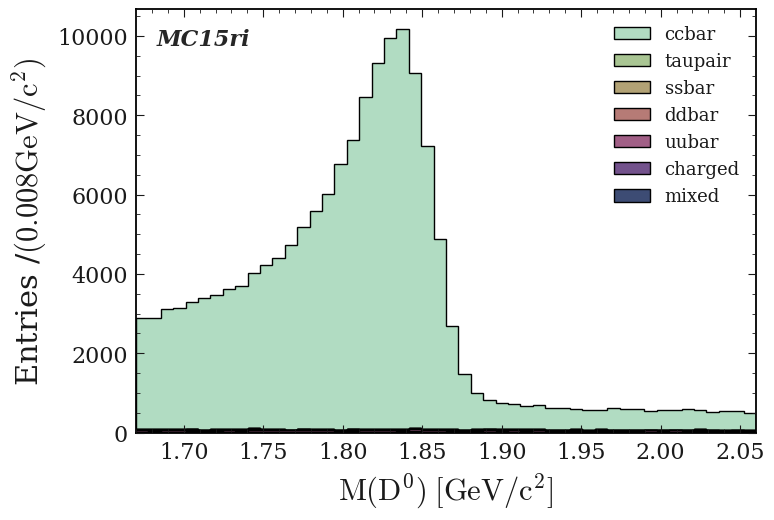

<Figure size 800x550 with 0 Axes>

In [5]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    ccbar_bkg = {var : pd_phigamma_ccbar[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

Dstarp_Q


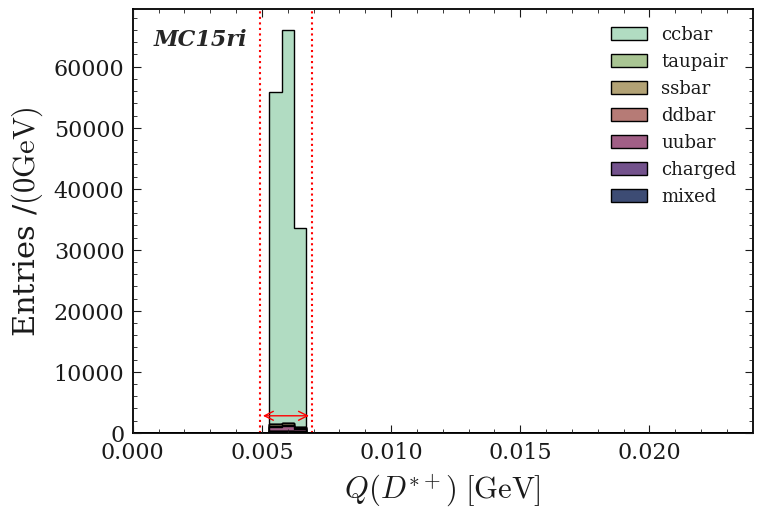

<Figure size 800x550 with 0 Axes>

In [6]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["Dstarp_Q"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : pd_phigamma_mixed[var] }
    charged_bkg = {var : pd_phigamma_charged[var] }
    ccbar_bkg = {var : pd_phigamma_ccbar[var] }
    uubar_bkg = {var : pd_phigamma_uubar[var] }
    ddbar_bkg = {var : pd_phigamma_ddbar[var] }
    ssbar_bkg = {var : pd_phigamma_ssbar[var] }
    taupair_bkg = {var : pd_phigamma_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,0.024)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    plt.axvline(x=0.00593-0.0010,  color='red', linestyle='dotted')
    plt.axvline(x=0.00593+0.0010,  color='red', linestyle='dotted')

    ax = plt.gca()
    ax.annotate('', xy=(0.00593-0.0010,2800), xytext=(0.00593+0.0010,2800), arrowprops=dict(arrowstyle="<->",color="red"),)
    
    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$Q(D^{*+}) \; [\mathrm{GeV}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV})$');
    plt.show()
    plt.clf()

In [7]:
# sigMC_file_loc = '/media/jykim/T7/storage/01_recon/antiKstar/v2_pre_omega_const_signalMC_recon_mdst_antiKstar.root'
# base_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && Dstarp_isSignal==1'
# variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p']
# tree='antiKstar'

# xrange=(0,0.01)
# xbins = np.linspace(*xrange,51)
# pd_phigamma_sigMC = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)


In [8]:
# plt.hist(pd_phigamma_sigMC['Dstarp_Q'], bins=xbins, histtype='step');
# plt.axvline(x=0.00593-0.001,  color='red', linestyle='dotted')
# plt.axvline(x=0.00593+0.001,  color='red', linestyle='dotted')

# print(len(pd_phigamma_sigMC))

In [9]:
# phig_pre_extraction_cut = 'abs(Omega_M - 0.78265)< 0.015 & abs(Dstarp_Q-0.00593)<0.0010'
# phig_pre_extraction_cut = 'abs(antiKstar_M - 0.89555)< 0.06 & abs(Dstarp_Q-0.00593)<0.0006'
phig_pre_extraction_cut = 'abs(antiKstar_M - 0.89555)< 0.06 & abs(Dstarp_Q-0.00593)<0.002'
phig_pre_extraction_cut = 'abs(antiKstar_M - 0.89555)< 0.06 & abs(Dstarp_Q-0.00593)<0.001'
phig_pre_extraction_cut = 'abs(antiKstar_M - 0.89555)< 0.06 & abs(Dstarp_Q-0.00593)<0.0006'

phig_pre_extraction_ccbar = pd_phigamma_ccbar.query(phig_pre_extraction_cut)
phig_pre_extraction_uubar = pd_phigamma_uubar.query(phig_pre_extraction_cut)
phig_pre_extraction_ddbar = pd_phigamma_ddbar.query(phig_pre_extraction_cut)
phig_pre_extraction_ssbar = pd_phigamma_ssbar.query(phig_pre_extraction_cut)
phig_pre_extraction_charged = pd_phigamma_charged.query(phig_pre_extraction_cut)
phig_pre_extraction_mixed = pd_phigamma_mixed.query(phig_pre_extraction_cut)
phig_pre_extraction_taupair = pd_phigamma_taupair.query(phig_pre_extraction_cut)


D0_M


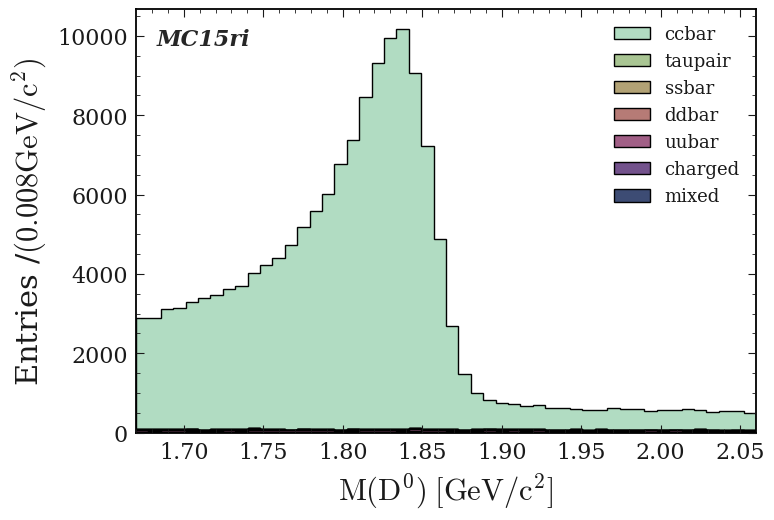

<Figure size 800x550 with 0 Axes>

In [10]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_pre_extraction_mixed[var] }
    charged_bkg = {var : phig_pre_extraction_charged[var] }
    ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
    uubar_bkg = {var : phig_pre_extraction_uubar[var] }
    ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
    taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()


Dstarp_CMS_p


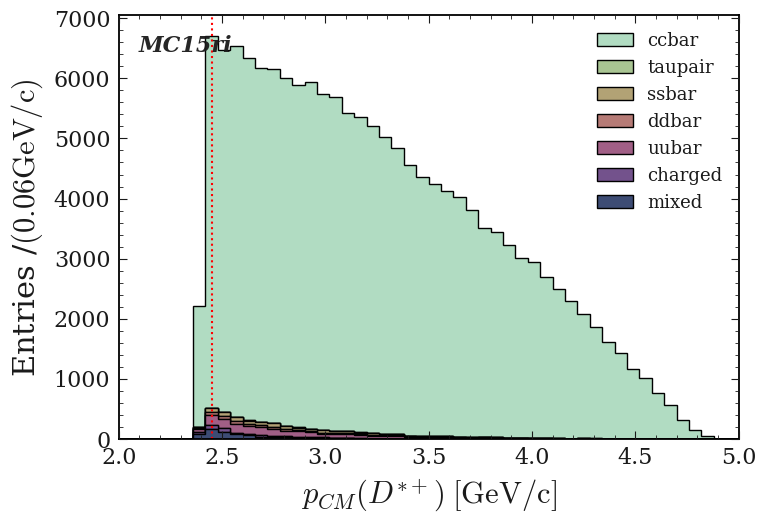

<Figure size 800x550 with 0 Axes>

In [11]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["Dstarp_CMS_p"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_pre_extraction_mixed[var] }
    charged_bkg = {var : phig_pre_extraction_charged[var] }
    ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
    uubar_bkg = {var : phig_pre_extraction_uubar[var] }
    ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
    taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(2,5)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    plt.axvline(x=2.45,  color='red', linestyle='dotted')    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$p_{CM}(D^{*+}) \; [\mathrm{GeV/c}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c})$');
    plt.show()
    plt.clf()


In [12]:
# labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


# colors=b2helix(7)

# data_list=dict()
# signal_variables = ["Pi0_Prob"]

# for var in signal_variables:
# #     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
#     print(var)
#     mixed_bkg = {var : phig_pre_extraction_mixed[var] }
#     charged_bkg = {var : phig_pre_extraction_charged[var] }
#     ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
#     uubar_bkg = {var : phig_pre_extraction_uubar[var] }
#     ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
#     ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
#     taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
#     #print(mixed_bkg)
# #     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

# #     for labeling in labels:
#     xrange=(0,1)
#     xbins = np.linspace(*xrange,51)
#     plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
# #     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
#     ax = plt.gca()

#     # Shrink current axis by 20%
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width , box.height])

#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend(prop={'size':13})
    
# #     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
#     ax=plt.gca()
# #     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

#     n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

#     ax.set_xlim(*xrange)
# #     ax.set_ylim(0,6000)

#     plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
#     width = xe[1]-xe[0]
#     plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
#     plt.show()
#     plt.clf()


In [13]:
# labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


# colors=b2helix(7)

# data_list=dict()
# signal_variables = ["antiKstar_MVA2"]

# for var in signal_variables:
# #     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
#     print(var)
#     mixed_bkg = {var : phig_pre_extraction_mixed[var] }
#     charged_bkg = {var : phig_pre_extraction_charged[var] }
#     ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
#     uubar_bkg = {var : phig_pre_extraction_uubar[var] }
#     ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
#     ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
#     taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
#     #print(mixed_bkg)
# #     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

# #     for labeling in labels:
#     xrange=(0,1)
#     xbins = np.linspace(*xrange,51)
#     plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
# #     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
#     ax = plt.gca()

#     # Shrink current axis by 20%
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width , box.height])

#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend(prop={'size':13})
    
# #     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
#     ax=plt.gca()
# #     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

#     n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

#     ax.set_xlim(*xrange)
# #     ax.set_ylim(0,6000)

#     plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
#     width = xe[1]-xe[0]
#     plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
#     plt.show()
#     plt.clf()


roe_pi0_InvM_75MeV


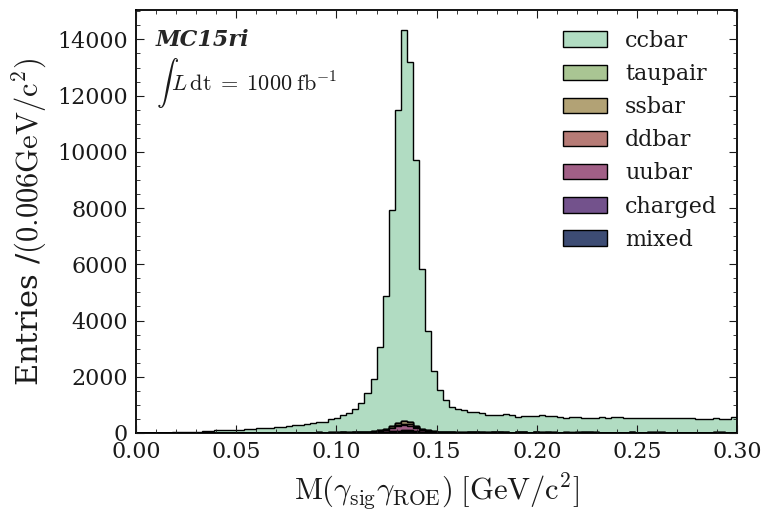

<Figure size 800x550 with 0 Axes>

In [14]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["roe_pi0_InvM_75MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_pre_extraction_mixed[var] }
    charged_bkg = {var : phig_pre_extraction_charged[var] }
    ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
    uubar_bkg = {var : phig_pre_extraction_uubar[var] }
    ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
    taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,0.3)
    xbins = np.linspace(*xrange,101)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    lumi(l="$1000\; \mathrm{fb}^{-1}$",px=0.033, py=0.810)
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    # plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    plt.xlabel("$\mathrm{M(\gamma_{sig}\gamma_{ROE})} \; [\mathrm{GeV/c^2}]$")

    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.tight_layout()

    plt.savefig('test.png')
    plt.show()
    plt.clf()

Belle2Pi0Veto_75MeV


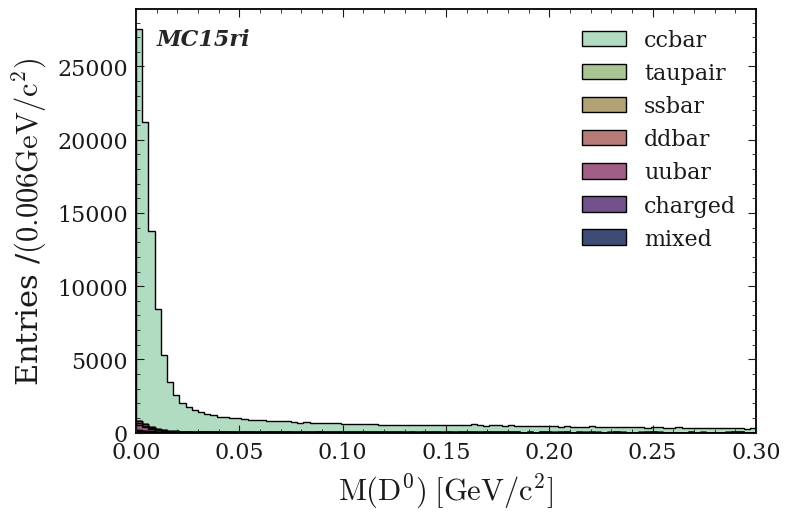

<Figure size 800x550 with 0 Axes>

In [21]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ['Belle2Pi0Veto_75MeV']

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_pre_extraction_mixed[var] }
    charged_bkg = {var : phig_pre_extraction_charged[var] }
    ccbar_bkg = {var : phig_pre_extraction_ccbar[var] }
    uubar_bkg = {var : phig_pre_extraction_uubar[var] }
    ddbar_bkg = {var : phig_pre_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_pre_extraction_ssbar[var] }
    taupair_bkg = {var : phig_pre_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0,0.3)
    xbins = np.linspace(*xrange,101)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

In [125]:
def calculate_FOM( bkg_pd, sig_pd, cut_list, scale_factor, massveto=bool):
    
    FOM_list = list()
    
    for cut_value in cut_list:
    
        if massveto==False:
            temp_cut = 'Dstarp_CMS_p > ' + str(cut_value) 
        else:
            temp_cut = 'Belle2Pi0Veto_75MeV > ' + str(cut_value) 
            
        temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        nbkg = len(temp_bkg_pd)

#         FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))
        FOM = scale_factor*nsig/(math.sqrt(scale_factor*nsig + nbkg))

        FOM_list.append(FOM)    
    
    return FOM_list

In [126]:
def calculate_eff( bkg_pd, sig_pd, cut_list, massveto=bool):
    
    eff_list = list()
    
    for cut_value in cut_list:
    
        if massveto==False:
            temp_cut = 'Dstarp_CMS_p > ' + str(cut_value) 
        else:
            temp_cut = 'Belle2Pi0Veto_75MeV > ' + str(cut_value) 
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)

        eff = nsig/(0.5*1e+6*0.6657)
        eff_list.append(eff)    
    
    return eff_list

In [127]:
def calculate_purity( bkg_pd, sig_pd, cut_list, massveto=bool):
    
    purity_list = list()
    
    for cut_value in cut_list:
    
        if massveto==False:
            temp_cut = 'Dstarp_CMS_p > ' + str(cut_value) 
        else:
            temp_cut = 'Belle2Pi0Veto_75MeV > ' + str(cut_value) 
        #temp_bkg_pd = bkg_pd.query(temp_cut)
        temp_sig_pd = sig_pd.query(temp_cut)

        nsig = len(temp_sig_pd)
        
        nREALsig = len(temp_sig_pd.query("Dstarp_isSignal==1"))
        
        #nbkg = len(temp_bkg_pd)

        purity = nREALsig/nsig
        purity_list.append(purity)    
    
    return purity_list

In [128]:
FOM_cut_list = np.linspace(2,3.5,151)
# FOM_cut_list = np.linspace(0, 0.03 ,301)

In [129]:
phig_bkg_pre_ext_all = pd.concat([phig_pre_extraction_ccbar,
                                phig_pre_extraction_uubar,
                                phig_pre_extraction_ddbar,
                                phig_pre_extraction_ssbar,
                                phig_pre_extraction_charged,
                                phig_pre_extraction_mixed,
                                phig_pre_extraction_taupair], ignore_index=True)

In [130]:
base_file_loc = '/media/jykim/T7/storage/01_recon/v26_sigbkg_pre_ext/'
base_file_loc = '/media/jykim/T7/storage/01_recon/massvetov2_sig_ext_1ab_sigbkg/'


sigMC_file_loc = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'

base_filter=' D0_M>1.8 && D0_M<1.9 && abs(antiKstar_M - 0.89555)< 0.06 && abs(Dstarp_Q-0.00593)<0.0006'

# base_filter += '&& (iCascDcyBrP_Dst_0 ==14 || iCascDcyBrP_Dst_0 ==57)'

#base_filter += '&& iDcyBrIncDcyBr_D0Vg_0 == 0'
base_filter += '&& nSigCascDcyBr_1==1'

variables=['D0_M','D0_cosHel_0','antiKstar_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','Belle2Pi0Veto_75MeV']
tree='antiKstar'

xrange=(0,0.01)
xbins = np.linspace(*xrange,51)
pd_phigamma_sigMC = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)

print(len(pd_phigamma_sigMC))

6882


In [53]:
# half_1_sigMC = '/media/jykim/T7/storage/01_recon/antiKstar/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_antiKstar.root'
half_1_sigMC = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_antiKstar_*.root'

base_filter=' D0_M>1.8 && D0_M<1.9 && abs(antiKstar_M - 0.89555)< 0.06 && abs(Dstarp_Q-0.00593)<0.0006'
variables=['D0_M','D0_cosHel_0','antiKstar_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','Belle2Pi0Veto_75MeV']
tree='antiKstar'
pd_half_1_sigMC = get_pd(file=half_1_sigMC, tree=tree,base_filter=base_filter,variables=variables)

scale_factor = len(pd_phigamma_sigMC)/len(pd_half_1_sigMC )

NameError: name 'pd_phigamma_sigMC' is not defined

In [ ]:
scale_factor

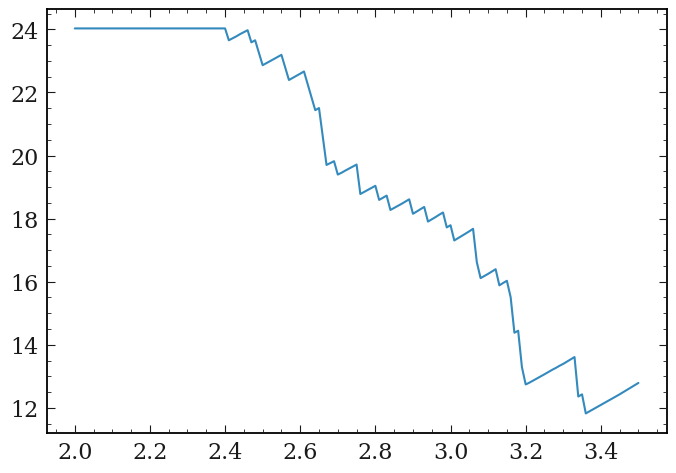

In [133]:
FOM_phig_list = calculate_FOM(phig_bkg_pre_ext_all,pd_half_1_sigMC, FOM_cut_list, scale_factor,massveto=False)
plt.plot(FOM_cut_list,FOM_phig_list);

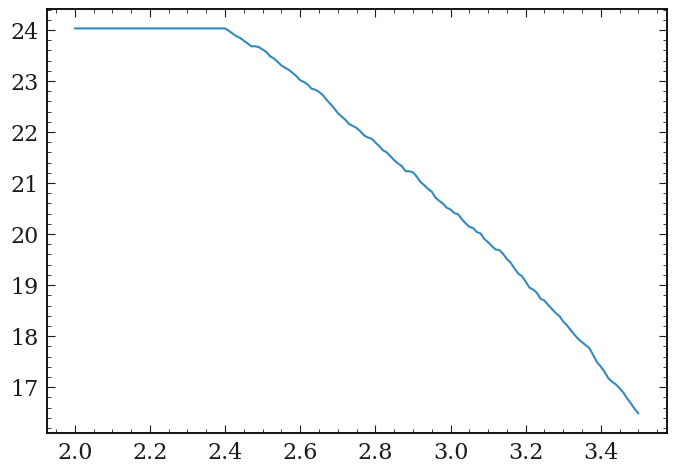

In [134]:
FOM_phig_list = calculate_FOM(phig_bkg_pre_ext_all,pd_phigamma_sigMC, FOM_cut_list, 1,massveto=False)
plt.plot(FOM_cut_list,FOM_phig_list);

In [135]:
# #sigMC_file_loc = '/group/belle/users/jaeyoung/storage/01_recon/antiKstar/trainv2_pre_signalMC_recon_mdst_antiKstar.root'
# sigMC_file_loc = '/media/jykim/T7/storage/01_recon/antiKstar/gE_700MEV_signalMC_recon_mdst_antiKstar.root'
# sigMC_file_loc = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_pre_extraction_signalMC_recon_mdst_antiKstar.root'
# sigMC_file_loc = '/media/jykim/T7/storage/01_recon/antiKstar/trainv2new_0009_Q_pre_extract_signalMC_recon_mdst_antiKstar.root'
# sigMC_file_loc = '/media/jykim/T7/storage/01_recon/antiKstar/v2_pre_omega_const_signalMC_recon_mdst_antiKstar.root'
# # sigMC_file_loc = base_file_loc + 'topo/resultfile/result_antiKstar/standard.root'
# sigMC_file_loc = '/media/jykim/T7/storage/01_recon/antiKstar/v9mask_pre_extraction_signalMC_recon_mdst_antiKstar.root'
sigMC_file_loc = '/media/jykim/T7/storage/01_recon/antiKstar/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_antiKstar.root'
sigMC_file_loc = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_antiKstar_*.root'



# base_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06  && abs(antiKstar_M - 0.89555)< 0.06  && abs(Dstarp_Q-0.00593)<0.0010'
# base_filter='Pis_charge==1 && D0_M>1.67 && D0_M<2.06 && abs(antiKstar_M - 0.89555)< 0.06 && abs(Dstarp_Q-0.00593)<0.001'
base_filter=' D0_M>1.8 && D0_M<1.9 && abs(antiKstar_M - 0.89555)< 0.06 && abs(Dstarp_Q-0.00593)<0.0006'
base_filter=' D0_M>1.8 && D0_M<1.9'

# base_filter += '&& iCascDcyBrP_Dst_0 !=30'

variables=['D0_M','D0_cosHel_0','antiKstar_M','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','Belle2Pi0Veto_75MeV']
tree='antiKstar'

xrange=(0,0.01)
xbins = np.linspace(*xrange,51)
pd_phigamma_isSignal_all_sigMC = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)

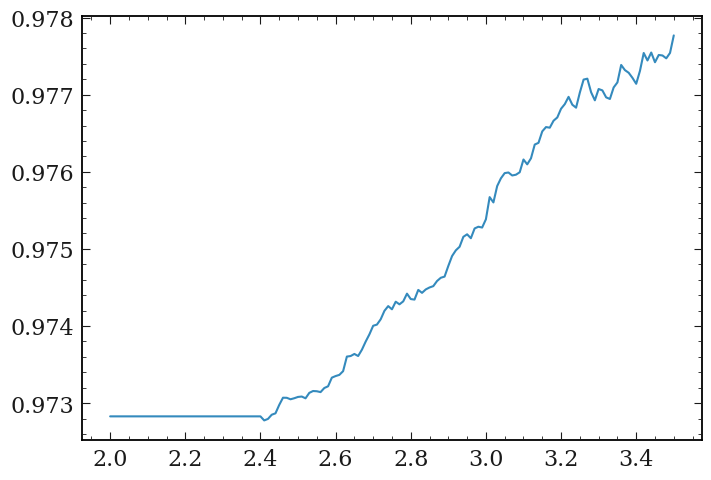

In [136]:
purity_phig_list = calculate_purity(phig_bkg_pre_ext_all, pd_phigamma_isSignal_all_sigMC, FOM_cut_list,massveto=False)
plt.plot(FOM_cut_list,purity_phig_list);

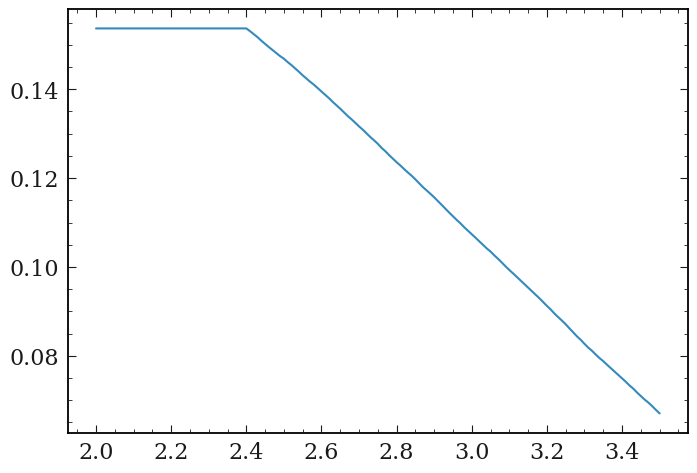

In [137]:
eff_phig_list = calculate_eff(phig_bkg_pre_ext_all, pd_phigamma_isSignal_all_sigMC, FOM_cut_list, massveto=False)
plt.plot(FOM_cut_list,eff_phig_list);

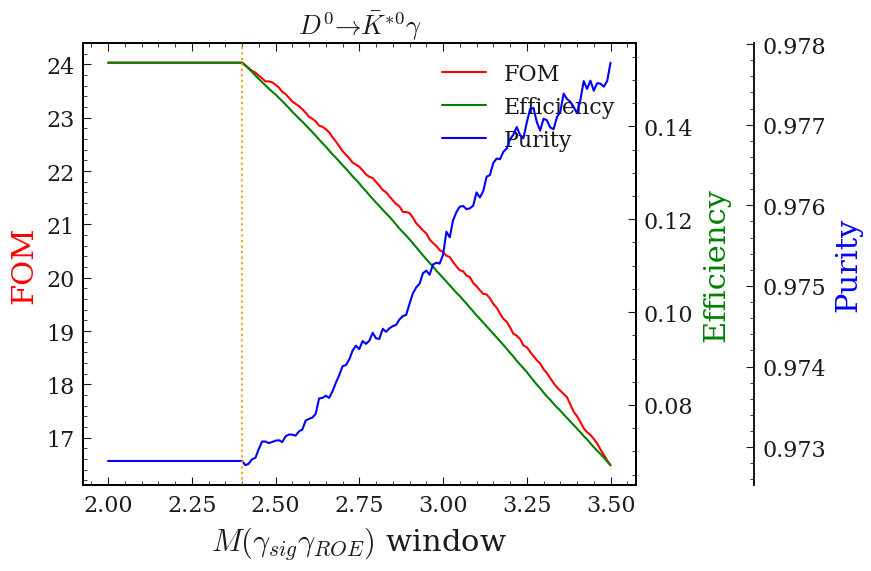

In [141]:
import matplotlib.pyplot as plt 

# Create figure and subplot manually
# fig = plt.figure()
# host = fig.add_subplot(111)

# More versatile wrapper
fig, host = plt.subplots(figsize=(9,6)) # (width, height) in inches
# (see https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.subplots.html)
    
par1 = host.twinx()
par2 = host.twinx()
    
# host.set_xlim(0, 0.03)

# host.set_xlim(2, 3.5)
# host.set_ylim(0, 2)
#par2.set_ylim(0.94, 0.99)
#par1.set_ylim(0.04,0.12 )


# par2.axis["right"] = new_fixed_axis(loc="right", axes=par2,
#                                         offset=(offset, 0))
# par2.axis["right"].toggle(all=True)

# host.set_xlabel(r"$P_{CM}(D^{*+})$ cut")
host.set_xlabel(r"$M(\gamma_{sig}\gamma_{ROE})$ window")

host.set_ylabel("FOM")
par1.set_ylabel("Efficiency")
par2.set_ylabel("Purity")

# color1 = plt.cm.viridis(0)
# color2 = plt.cm.viridis(0.5)
# color3 = plt.cm.viridis(.9)
color1 = 'r'
color2 = 'g'
color3 = 'b'

p1, = host.plot(FOM_cut_list, FOM_phig_list,    color=color1, label="FOM")
p2, = par1.plot(FOM_cut_list, eff_phig_list,    color=color2, label="Efficiency")
p3, = par2.plot(FOM_cut_list, purity_phig_list, color=color3, label="Purity")

lns = [p1, p2, p3]
# host.legend(handles=lns, loc='upper right')
host.legend(handles=lns, loc='best')

# right, left, top, bottom
offset = 85
par2.spines['right'].set_position(('outward', offset))

# no x-ticks                 
# par2.xaxis.set_ticks([])

# Sometimes handy, same for xaxis
# par2.yaxis.set_ticks_position('right')

# Move "Velocity"-axis to the left
# par2.spines['left'].set_position(('outward', 60))
# par2.spines['left'].set_visible(True)
# par2.yaxis.set_label_position('left')
# par2.yaxis.set_ticks_position('left')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

plt.title(r'$D^0 \to \bar{K}^{*0} \gamma$')
plt.axvline(x=2.4,  color='orange', linestyle='dotted')
# plt.axvline(x=0.02,  color='orange', linestyle='dotted')

# Adjust spacings w.r.t. figsize
fig.tight_layout()
# Alternatively: bbox_inches='tight' within the plt.savefig function 
#                (overwrites figsize)
# plt.savefig('/media/jykim/T7/saved_plots/pi0veto/FOM/FOM_massveto_antiKstar_1ab.png')


In [62]:
max_index= FOM_phig_list.index(max(FOM_phig_list))
FOM_cut_list[max_index]

0.0013000000000000002

In [15]:
phig_sig_extraction_cut = 'Dstarp_CMS_p>2.45 & Pi0_Prob<0.85 & abs(D0_cosHel_0)<0.8'
phig_sig_extraction_cut = 'Dstarp_CMS_p>2.4 & antiKstar_MVA2>0.4'
phig_sig_extraction_cut = 'Dstarp_CMS_p>2.4 & Belle2Pi0Veto_75MeV>0.022'
# phig_sig_extraction_cut = 'Dstarp_CMS_p>2.4 & pi0_veto_isSignal_75MeV==1'

#phig_sig_extraction_cut = 'Pi0_Prob<0.8'

phig_sig_extraction_ccbar = phig_pre_extraction_ccbar.query(phig_sig_extraction_cut)
phig_sig_extraction_uubar = phig_pre_extraction_uubar.query(phig_sig_extraction_cut)
phig_sig_extraction_ddbar = phig_pre_extraction_ddbar.query(phig_sig_extraction_cut)
phig_sig_extraction_ssbar = phig_pre_extraction_ssbar.query(phig_sig_extraction_cut)
phig_sig_extraction_charged = phig_pre_extraction_charged.query(phig_sig_extraction_cut)
phig_sig_extraction_mixed = phig_pre_extraction_mixed.query(phig_sig_extraction_cut)
phig_sig_extraction_taupair = phig_pre_extraction_taupair.query(phig_sig_extraction_cut)


In [16]:
len(phig_sig_extraction_ccbar)

70514

In [17]:
len(phig_sig_extraction_uubar)


728

In [18]:
len(phig_sig_extraction_ddbar)


232

In [19]:
len(phig_sig_extraction_mixed)


325

D0_M


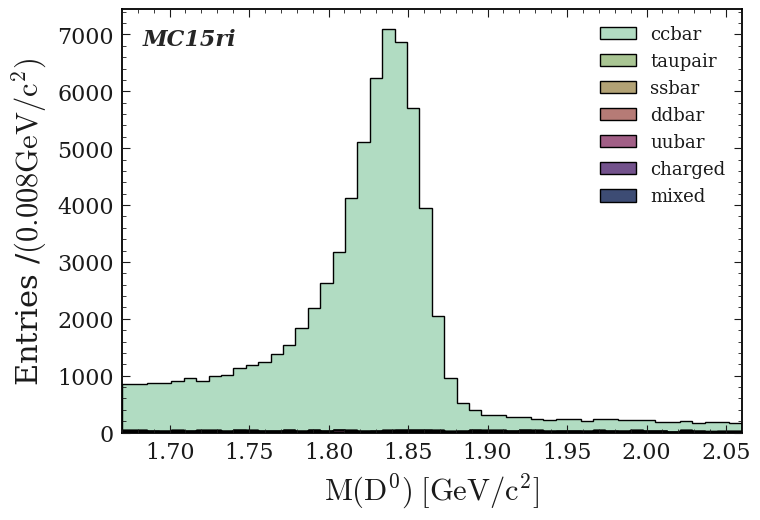

<Figure size 800x550 with 0 Axes>

In [20]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_sig_extraction_mixed[var] }
    charged_bkg = {var : phig_sig_extraction_charged[var] }
    ccbar_bkg = {var : phig_sig_extraction_ccbar[var] }
    uubar_bkg = {var : phig_sig_extraction_uubar[var] }
    ddbar_bkg = {var : phig_sig_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_sig_extraction_ssbar[var] }
    taupair_bkg = {var : phig_sig_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t=r"",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,600)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

D0_M


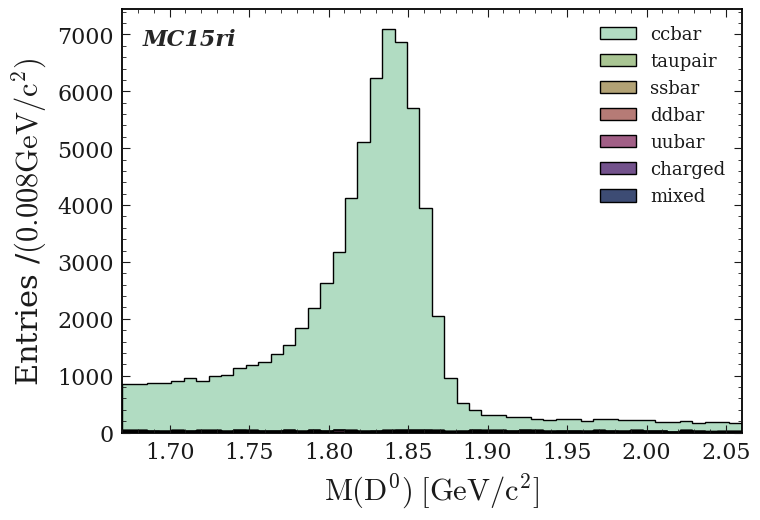

<Figure size 800x550 with 0 Axes>

In [21]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["D0_M"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_sig_extraction_mixed[var] }
    charged_bkg = {var : phig_sig_extraction_charged[var] }
    ccbar_bkg = {var : phig_sig_extraction_ccbar[var] }
    uubar_bkg = {var : phig_sig_extraction_uubar[var] }
    ddbar_bkg = {var : phig_sig_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_sig_extraction_ssbar[var] }
    taupair_bkg = {var : phig_sig_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(1.67,2.06)
    xbins = np.linspace(*xrange,51)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t=r"",logo="MC15ri")
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=(1.67,2.06))

    ax.set_xlim(1.67,2.06)
#     ax.set_ylim(0,13000)

    plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.show()
    plt.clf()

roe_pi0_InvM_75MeV


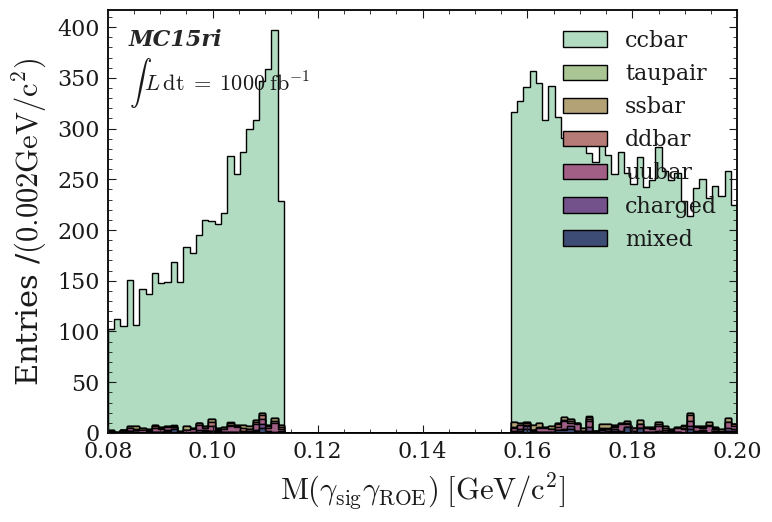

<Figure size 800x550 with 0 Axes>

In [22]:
labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']


colors=b2helix(7)

data_list=dict()
signal_variables = ["roe_pi0_InvM_75MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']
    print(var)
    mixed_bkg = {var : phig_sig_extraction_mixed[var] }
    charged_bkg = {var : phig_sig_extraction_charged[var] }
    ccbar_bkg = {var : phig_sig_extraction_ccbar[var] }
    uubar_bkg = {var : phig_sig_extraction_uubar[var] }
    ddbar_bkg = {var : phig_sig_extraction_ddbar[var] }
    ssbar_bkg = {var : phig_sig_extraction_ssbar[var] }
    taupair_bkg = {var : phig_sig_extraction_taupair[var] }
    
    
    #print(mixed_bkg)
#     data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  
    data_list[var]  = [mixed_bkg[var], charged_bkg[var], uubar_bkg[var], ddbar_bkg[var], ssbar_bkg[var], taupair_bkg[var], ccbar_bkg[var]]  

#     for labeling in labels:
    xrange=(0.08,0.2)
    xbins = np.linspace(*xrange,101)
    plt.hist(data_list[var], bins=xbins, histtype='stepfilled', stacked=True,label=labels,color=colors,edgecolor='black')
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend()
    
#     DRAW(pd_Dtokshortpi0, cut)
    
    watermark(t="",logo="MC15ri")
    lumi(l="$1000\; \mathrm{fb}^{-1}$",px=0.033, py=0.810)
    ax=plt.gca()
#     ax.set_title(r'$D^0 \to K^0_S \pi^0$ sample' )

    n, xe = np.histogram(ccbar_bkg[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    # plt.xlabel("$\mathrm{M(D^0)} \; [\mathrm{GeV/c^2}]$")
    plt.xlabel("$\mathrm{M(\gamma_{sig}\gamma_{ROE})} \; [\mathrm{GeV/c^2}]$")

    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + '\mathrm{GeV/c^2})$');
    plt.tight_layout()

    plt.savefig('test.png')
    plt.show()
    plt.clf()

In [24]:
pd_merged = pd.concat([phig_sig_extraction_mixed, phig_sig_extraction_charged, phig_sig_extraction_ccbar, \
                     phig_sig_extraction_uubar, phig_sig_extraction_ddbar, phig_sig_extraction_ssbar, phig_sig_extraction_taupair])

In [25]:
# sigMC_file_loc = '/media/jykim/T7/storage/01_recon/antiKstar/D0_v26_half1M_1_pre_ext_signalMC_recon_mdst_antiKstar.root'
sigMC_file_loc = '/media/jykim/T7/storage/01_recon/antiKstar/D0_massveto_v2_half_1_sig_ext_signalMC_recon_mdst_antiKstar_*.root'

# base_filter=' D0_M>1.67 && D0_M<2.06 && abs(antiKstar_M - 0.89555)< 0.06 && abs(Dstarp_Q-0.00593)<0.0006 && Dstarp_CMS_p>2.4'
base_filter=' D0_M>1.67 && D0_M<2.06 '
# base_filter += '& pi0_veto_isSignal_75MeV!=1'
base_filter += '& Belle2Pi0Veto_75MeV>0.022'


variables=['D0_M','D0_cosHel_0','antiKstar_M','Dstarp_Q','Dstarp_CMS_p']
 # variables += ['Pi0_Prob']
# variables += ['antiKstar_MVA2']
variables += ['roe_pi0_InvM', 'pi0veto_Easym', 'pi0_soft_cosHelicityAngleMomentum' ,'pi0_veto_isSignal','Belle2Pi0Veto',\
            'roe_pi0_InvM_50MeV', 'pi0veto_Easym_50MeV', 'pi0_soft_cosHelicityAngleMomentum_50MeV' ,'pi0_veto_isSignal_50MeV','Belle2Pi0Veto_50MeV',\
            'roe_pi0_InvM_75MeV', 'pi0veto_Easym_75MeV', 'pi0_soft_cosHelicityAngleMomentum_75MeV' ,'pi0_veto_isSignal_75MeV','Belle2Pi0Veto_75MeV',\
            'roe_pi0_InvM_100MeV', 'pi0veto_Easym_100MeV', 'pi0_soft_cosHelicityAngleMomentum_100MeV' ,'pi0_veto_isSignal_100MeV','Belle2Pi0Veto_100MeV',\
            'roe_pi0_InvM_125MeV', 'pi0veto_Easym_125MeV', 'pi0_soft_cosHelicityAngleMomentum_125MeV' ,'pi0_veto_isSignal_125MeV','Belle2Pi0Veto_125MeV',\
            'roe_pi0_InvM_150MeV', 'pi0veto_Easym_150MeV', 'pi0_soft_cosHelicityAngleMomentum_150MeV' ,'pi0_veto_isSignal_150MeV','Belle2Pi0Veto_150MeV',\
            'roe_pi0_InvM_mask', 'pi0veto_Easym_mask', 'pi0_soft_cosHelicityAngleMomentum_mask' ,'pi0_veto_isSignal_mask','gamma_genMotherPDG']
# variables=['D0_M','D0_cosHel_0','Dstarp_Q','Dstarp_CMS_p','Dstarp_isSignal','Pi0_Prob']
tree='antiKstar'

pd_phigamma_isSignal_all_sigMC = get_pd(file=sigMC_file_loc, tree=tree,base_filter=base_filter,variables=variables)

In [26]:
pd_phigamma_isSignal_all_sigMC.head()

,D0_M,D0_cosHel_0,antiKstar_M,Dstarp_Q,Dstarp_CMS_p,roe_pi0_InvM,pi0veto_Easym,pi0_soft_cosHelicityAngleMomentum,pi0_veto_isSignal,Belle2Pi0Veto,...,roe_pi0_InvM_150MeV,pi0veto_Easym_150MeV,pi0_soft_cosHelicityAngleMomentum_150MeV,pi0_veto_isSignal_150MeV,Belle2Pi0Veto_150MeV,roe_pi0_InvM_mask,pi0veto_Easym_mask,pi0_soft_cosHelicityAngleMomentum_mask,pi0_veto_isSignal_mask,gamma_genMotherPDG
0,1.863484,0.023799,0.894553,0.005946,2.730387,0.136495,0.966959,-0.971925,NaN,0.001515,...,0.516756,0.794447,-0.847657,0.0,0.381776,0.266881,0.907752,-0.924864,0.0,421.0
1,1.884407,0.009216,0.901398,0.005803,2.752779,0.137456,0.903390,-0.924531,NaN,0.002476,...,0.947109,0.184289,0.236777,0.0,0.812129,0.313398,0.702678,-0.779825,0.0,421.0
2,1.859697,-0.288502,0.892007,0.005987,4.177848,0.147098,0.979327,-0.980907,NaN,0.012118,...,0.708608,0.867643,-0.898032,0.0,0.573628,0.708608,0.867643,-0.898032,0.0,421.0
3,1.859072,-0.166990,0.916893,0.005980,3.518448,0.226062,0.982528,-0.987042,NaN,0.091082,...,1.397635,0.796998,-0.943592,0.0,1.262655,0.587682,0.945651,-0.975053,0.0,421.0
4,1.835517,-0.933434,0.913155,0.006139,3.015169,0.163449,0.917669,-0.937924,NaN,0.028469,...,0.293146,0.613121,-0.645300,0.0,0.158166,0.097904,0.797375,-0.802799,0.0,421.0


In [27]:
# signal_variables = ["Pi0_Prob"]

# for var in signal_variables:
# #     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']

# #     for labeling in labels:
#     xrange=(0,1)
#     xbins = np.linspace(*xrange,51)
#     plt.hist(pd_merged[var], bins=xbins, histtype='stepfilled',label='background',density=True, hatch="//")
#     plt.hist(pd_phigamma_isSignal_all_sigMC[var], bins=xbins, histtype='step',label='signal',density=True, hatch="//")
    
# #     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
#     ax = plt.gca()

#     # Shrink current axis by 20%
#     box = ax.get_position()
#     ax.set_position([box.x0, box.y0, box.width , box.height])

#     # Put a legend to the right of the current axis
#     ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
#     plt.legend(prop={'size':13})
    
# #     DRAW(pd_Dtokshortpi0, cut)
    
# #     watermark(t="",logo="MC15ri")
#     ax=plt.gca()
#     ax.set_title(r'$D^0 \to \bar{K}^{*0} \gamma$' )

#     n, xe = np.histogram(phig_sig_extraction_ccbar[var], bins=50, range=xrange)

#     ax.set_xlim(*xrange)
# #     ax.set_ylim(0,6000)

#     plt.xlabel("$\pi^0$ probability")
#     width = xe[1]-xe[0]
#     plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
#     plt.show()
#     plt.clf()

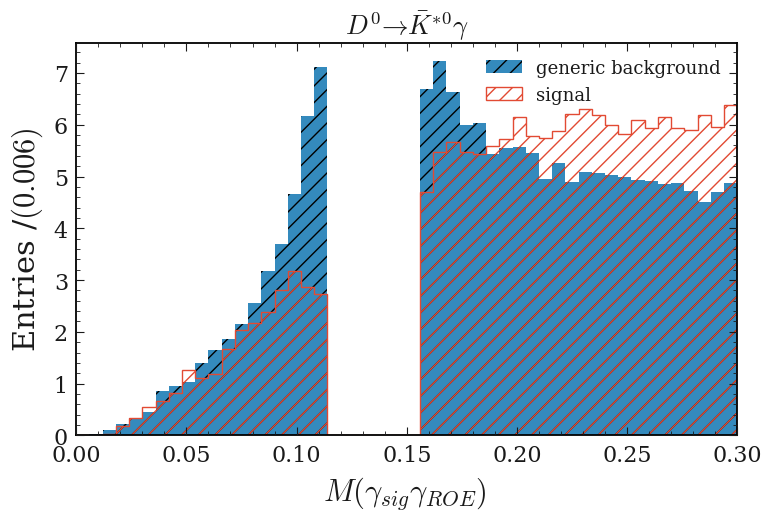

<Figure size 800x550 with 0 Axes>

In [28]:

signal_variables = ["roe_pi0_InvM_75MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']

#     for labeling in labels:
    xrange=(0,0.3)
    xbins = np.linspace(*xrange,51)
    plt.hist(pd_merged[var], bins=xbins, histtype='stepfilled',label='generic background',density=True, hatch="//")
    plt.hist(pd_phigamma_isSignal_all_sigMC[var], bins=xbins, histtype='step',label='signal',density=True, hatch="//")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
    # plt.axvline(x=0.02,  color='red', linestyle='dotted')

#     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to \bar{K}^{*0} \gamma$' )

    n, xe = np.histogram(pd_merged[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    # plt.xlabel("$\pi^0$ probability")
    plt.xlabel(r"$M(\gamma_{sig}\gamma_{ROE})$ ")

    
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + ')$');
    
    plt.tight_layout()

    plt.savefig('test2.png')

    plt.show()
    plt.clf()

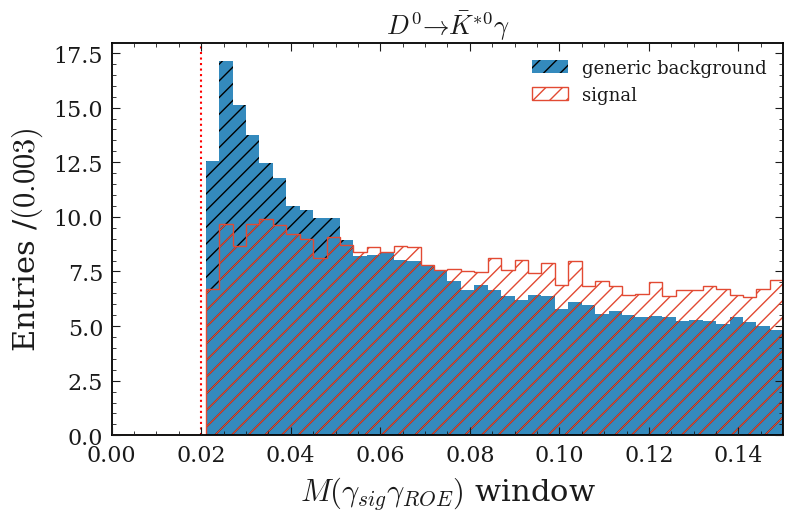

<Figure size 800x550 with 0 Axes>

In [29]:

signal_variables = ["Belle2Pi0Veto_75MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']

#     for labeling in labels:
    xrange=(0,0.15)
    xbins = np.linspace(*xrange,51)
    plt.hist(pd_merged[var], bins=xbins, histtype='stepfilled',label='generic background',density=True, hatch="//")
    plt.hist(pd_phigamma_isSignal_all_sigMC[var], bins=xbins, histtype='step',label='signal',density=True, hatch="//")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
    plt.axvline(x=0.02,  color='red', linestyle='dotted')

#     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to \bar{K}^{*0} \gamma$' )

    n, xe = np.histogram(pd_merged[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    # plt.xlabel("$\pi^0$ probability")
    plt.xlabel(r"$M(\gamma_{sig}\gamma_{ROE})$ window")

    
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.4f}".format(width).rstrip('0').rstrip('.') + ')$');
    
    plt.tight_layout()

    # plt.savefig('/media/jykim/T7/saved_plots/pi0veto/result/massveto/massveto_Mgg_antiKstar.png')

    plt.show()
    plt.clf()

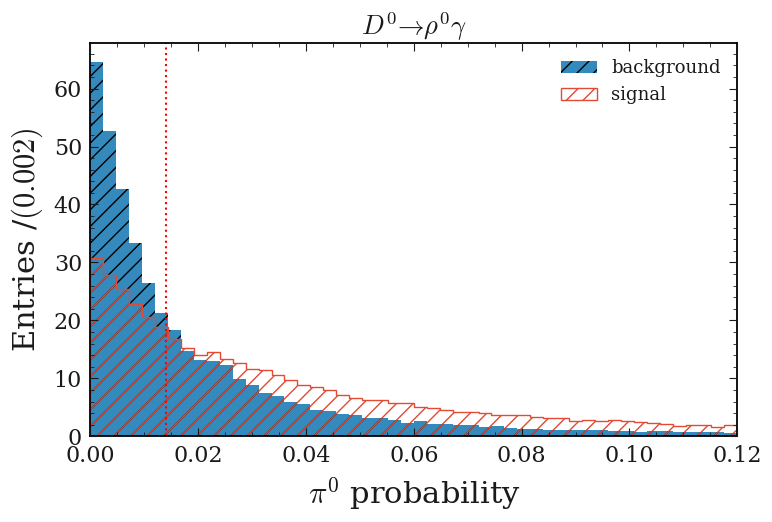

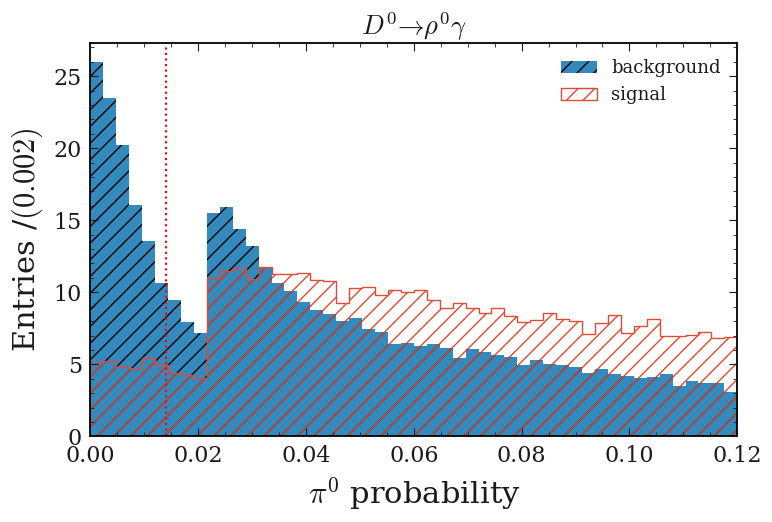

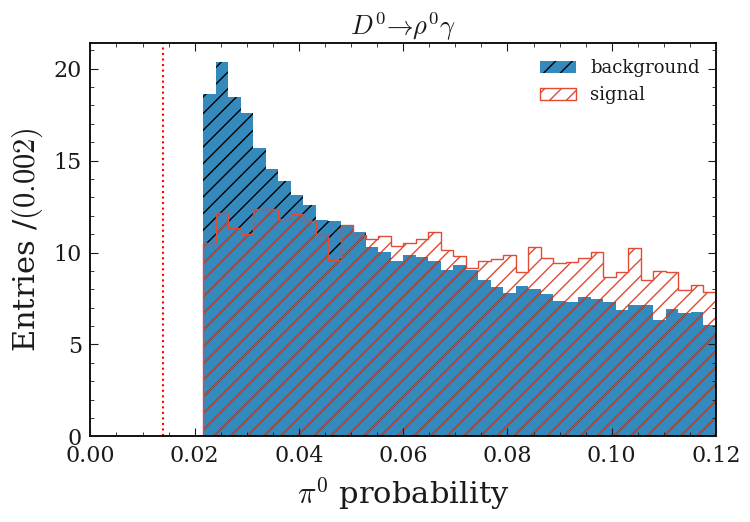

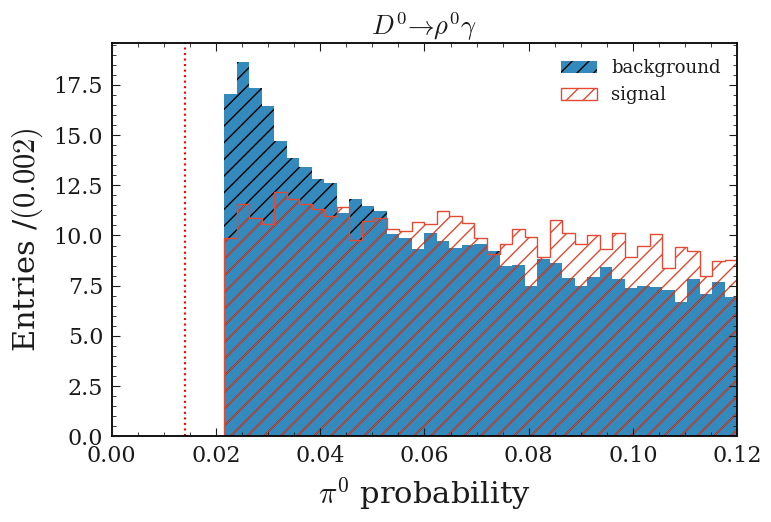

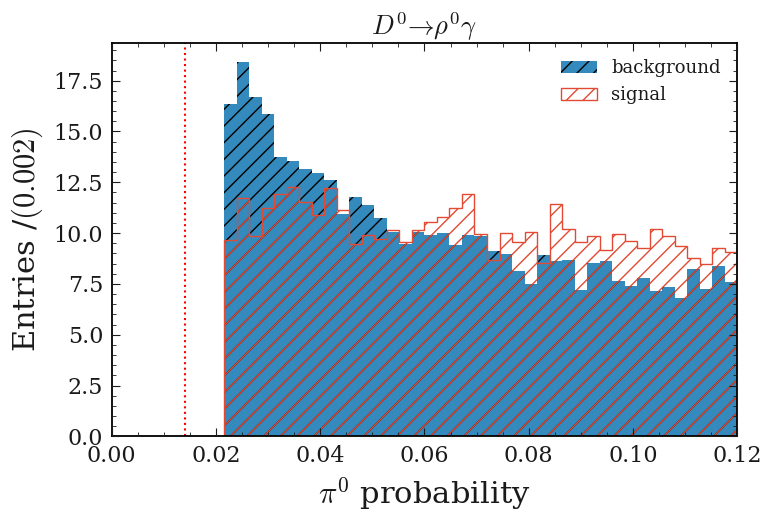

<Figure size 800x550 with 0 Axes>

In [30]:

signal_variables = ["Belle2Pi0Veto","Belle2Pi0Veto_50MeV","Belle2Pi0Veto_75MeV","Belle2Pi0Veto_100MeV","Belle2Pi0Veto_125MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']

#     for labeling in labels:
    xrange=(0,0.12)
    xbins = np.linspace(*xrange,51)
    plt.hist(pd_merged[var], bins=xbins, histtype='stepfilled',label='background',density=True, hatch="//")
    plt.hist(pd_phigamma_isSignal_all_sigMC[var], bins=xbins, histtype='step',label='signal',density=True, hatch="//")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
    plt.axvline(x=0.014,  color='red', linestyle='dotted')

#     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to \rho^0 \gamma$' )

    n, xe = np.histogram(pd_merged[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\pi^0$ probability")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.tight_layout()
    plt.show()
    plt.clf()

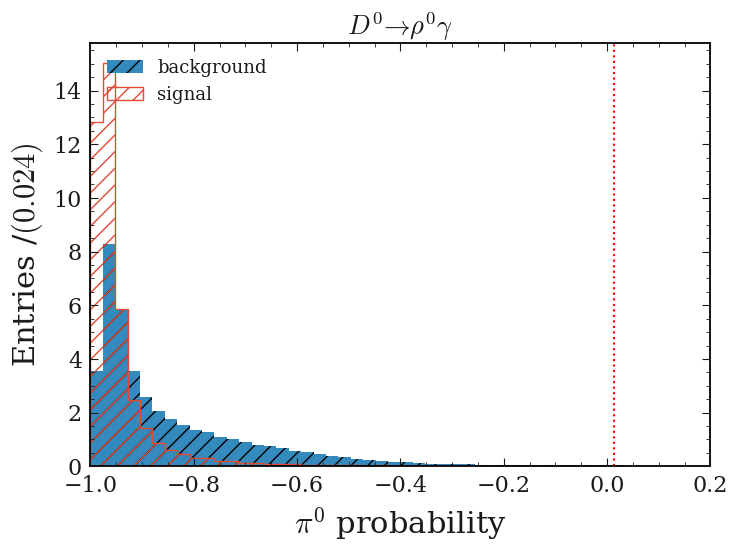

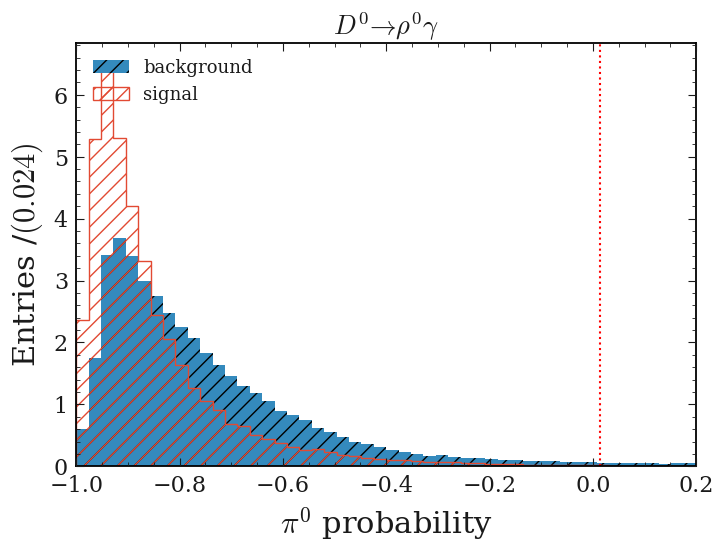

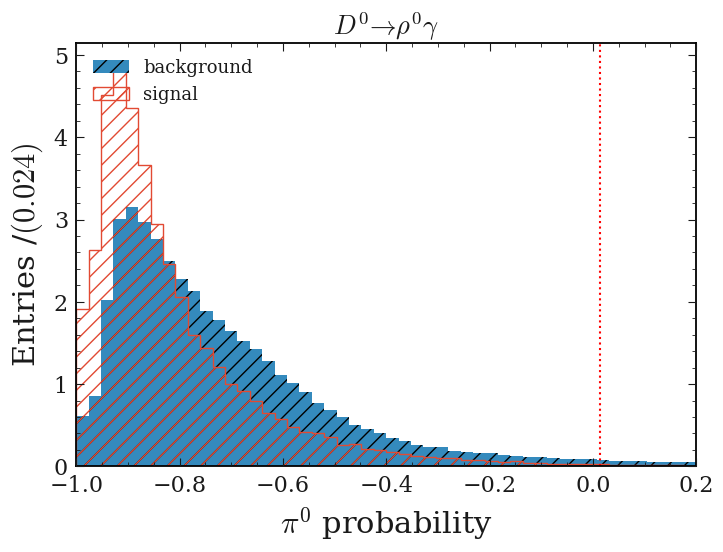

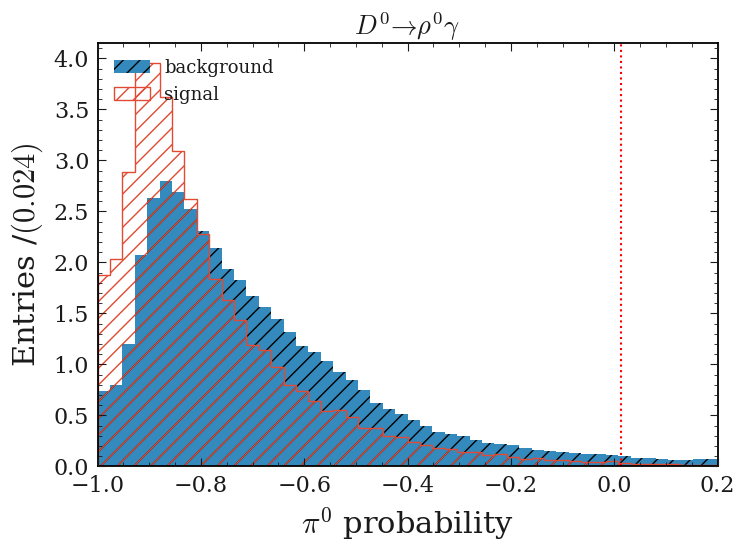

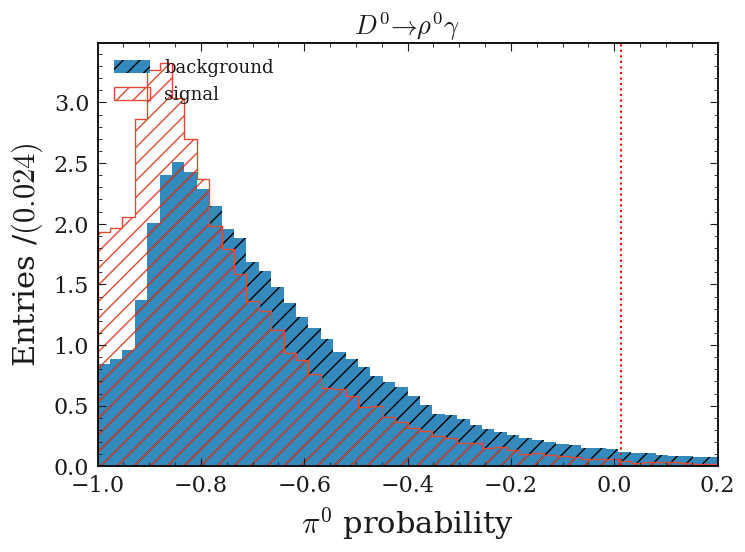

<Figure size 800x550 with 0 Axes>

In [85]:

signal_variables = ['pi0_soft_cosHelicityAngleMomentum',"pi0_soft_cosHelicityAngleMomentum_50MeV","pi0_soft_cosHelicityAngleMomentum_75MeV","pi0_soft_cosHelicityAngleMomentum_100MeV","pi0_soft_cosHelicityAngleMomentum_125MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']

#     for labeling in labels:
    xrange=(-1,0.2)
    xbins = np.linspace(*xrange,51)
    plt.hist(pd_merged[var], bins=xbins, histtype='stepfilled',label='background',density=True, hatch="//")
    plt.hist(pd_phigamma_isSignal_all_sigMC[var], bins=xbins, histtype='step',label='signal',density=True, hatch="//")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
    plt.axvline(x=0.014,  color='red', linestyle='dotted')

#     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to \rho^0 \gamma$' )

    n, xe = np.histogram(pd_merged[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\pi^0$ probability")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.show()
    plt.clf()

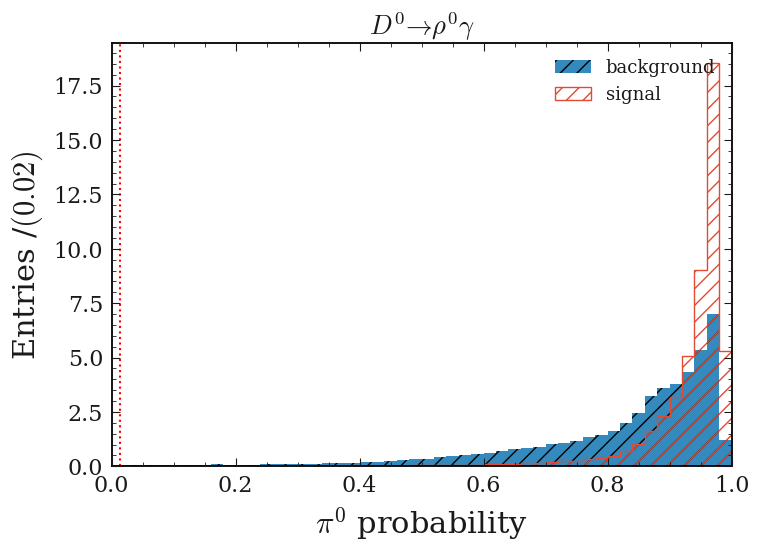

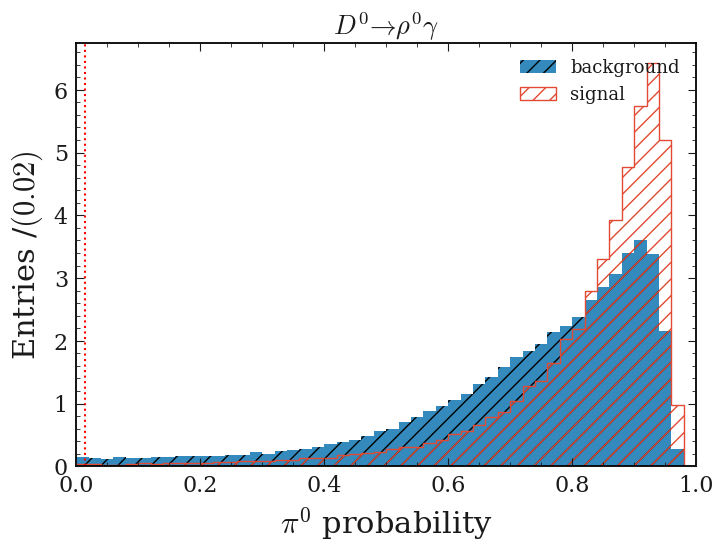

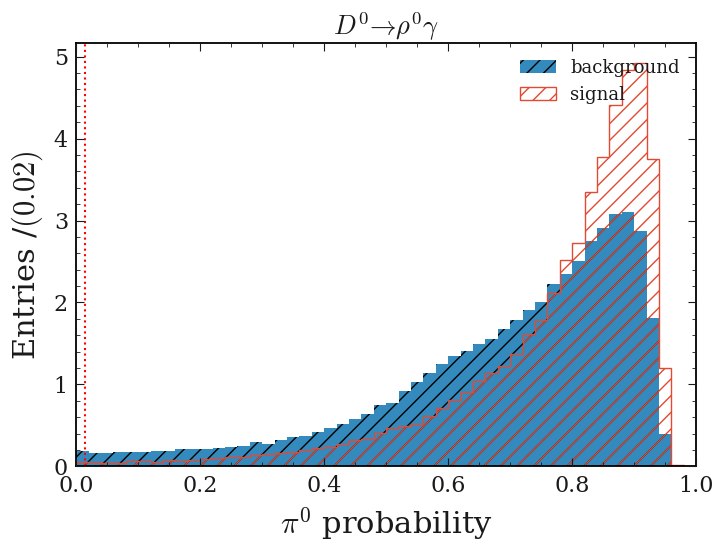

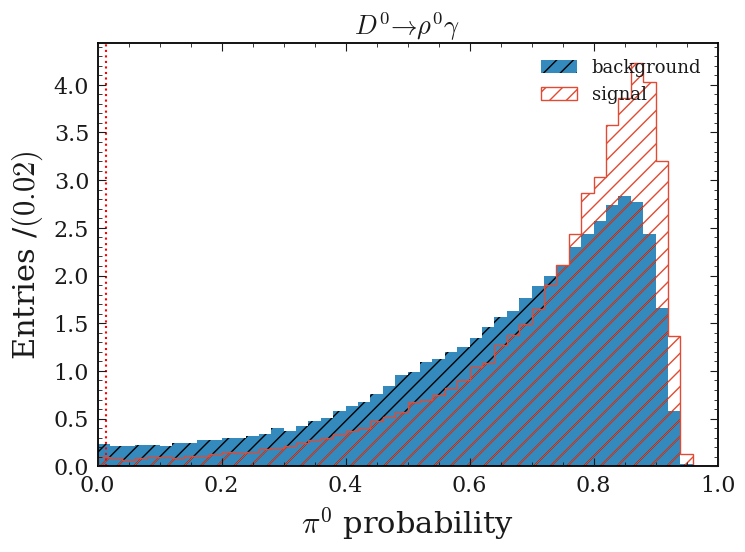

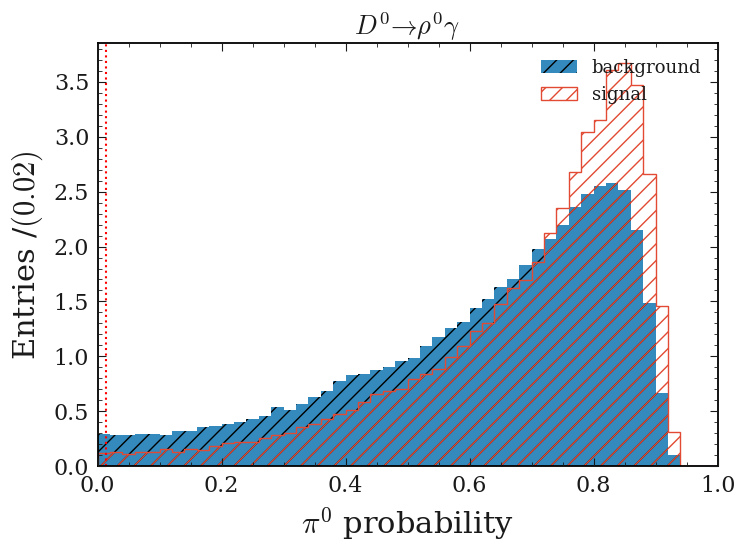

<Figure size 800x550 with 0 Axes>

In [ ]:

signal_variables = ['pi0veto_Easym',"pi0veto_Easym_50MeV","pi0veto_Easym_75MeV","pi0veto_Easym_100MeV","pi0veto_Easym_125MeV"]

for var in signal_variables:
#     labels = ['mixed', 'charged', 'uubar', 'ddbar', 'ssbar', 'taupair','ccbar']

#     for labeling in labels:
    xrange=(0,1)
    xbins = np.linspace(*xrange,51)
    plt.hist(pd_merged[var], bins=xbins, histtype='stepfilled',label='background',density=True, hatch="//")
    plt.hist(pd_phigamma_isSignal_all_sigMC[var], bins=xbins, histtype='step',label='signal',density=True, hatch="//")
    
#     plt.hist(pd_phigamma_ccbar_signal[var],bins=xbins,histtype='step',color='r',label='signal')
    
    ax = plt.gca()

    # Shrink current axis by 20%
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width , box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))   
    plt.legend(prop={'size':13})
    
    plt.axvline(x=0.014,  color='red', linestyle='dotted')

#     DRAW(pd_Dtokshortpi0, cut)
    
#     watermark(t="",logo="MC15ri")
    ax=plt.gca()
    ax.set_title(r'$D^0 \to \rho^0 \gamma$' )

    n, xe = np.histogram(pd_merged[var], bins=50, range=xrange)

    ax.set_xlim(*xrange)
#     ax.set_ylim(0,6000)

    plt.xlabel("$\pi^0$ probability")
    width = xe[1]-xe[0]
    plt.ylabel('Entries'+' /' + '$(' + ' '  + "{0:.3f}".format(width).rstrip('0').rstrip('.') + ')$');
    plt.show()
    plt.clf()